In [1]:
import pandas as pd

# Load the dataset to examine its structure
file_path = 'Q100_Waste_collection_data_England_2022_23.csv'
waste_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
waste_data.head()


WasteProcessorId  WasteStreamId  WasteProcessorOutputId  \
0           5024010        5022579                       0   
1           5024010        5022579                20398408   
2           5024011        5022580                       0   
3           5024011        5022580                20398409   
4           5024012        5022581                       0   

   SenderWasteProcessorOutputId              Authority  AuthorityId  \
0                             0  Luton Borough Council            1   
1                             0  Luton Borough Council            1   
2                             0  Luton Borough Council            1   
3                             0  Luton Borough Council            1   
4                             0  Luton Borough Council            1   

            Period  PeriodId  WasteStreamTypeId              WasteStreamType  \
0  Apr 22 - Jun 22       361                  1  Source segregated recyclate   
1  Apr 22 - Jun 22       361                  1  Source segregated recyclate   
2  Apr 22 - Jun 22       361                  1  Source segregated recyclate   
3  Apr 22 - Jun 22       361                  1  Source segregated recyclate   
4  Apr 22 - Jun 22       361                  1  Source segregated recyclate   

   ...  TonnesFromCommercialSources TonnesFromIndustrialSources  \
0  ...                          NaN                         NaN   
1  ...                          NaN                         NaN   
2  ...                          NaN                         NaN   
3  ...                          NaN                         NaN   
4  ...                          NaN                         NaN   

   TonnesFromNonHHSources TonnesFromWfHSources TonnesFromWnfHSources UsageId  \
0                     NaN                  NaN                   NaN       0   
1                     NaN                  NaN                   NaN       0   
2                     NaN                  NaN                   NaN       0   
3                     NaN                  NaN                   NaN       0   
4                     NaN                  NaN                   NaN       0   

  Usage QuarterlyComments  MonthlyComments MaterialGroup  
0   NaN               NaN              NaN         Glass  
1   NaN               NaN              NaN         Glass  
2   NaN               NaN              NaN         Tyres  
3   NaN               NaN              NaN         Tyres  
4   NaN               NaN              NaN           NaN  

[5 rows x 35 columns]

In [2]:
# Initial overview of the dataset for cleaning and preprocessing
waste_data.info()

# Check for missing values
missing_values = waste_data.isnull().sum()

# Display missing values per column
missing_values[missing_values > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284463 entries, 0 to 284462
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   WasteProcessorId              284463 non-null  int64  
 1   WasteStreamId                 284463 non-null  int64  
 2   WasteProcessorOutputId        284463 non-null  int64  
 3   SenderWasteProcessorOutputId  284463 non-null  int64  
 4   Authority                     284463 non-null  object 
 5   AuthorityId                   284463 non-null  int64  
 6   Period                        284463 non-null  object 
 7   PeriodId                      284463 non-null  int64  
 8   WasteStreamTypeId             284463 non-null  int64  
 9   WasteStreamType               284463 non-null  object 
 10  FacilityTypeId                284463 non-null  int64  
 11  FacilityType                  270526 non-null  object 
 12  NationalFacilityId            284463 non-nul

FacilityType                    13937
FacilityName                   131149
FacilityAddress                133143
FacilityPostCode               156232
FacilityLicence                186955
FacilityCode                   277684
OutputProcessTypeId                 9
OutputProcessType               49996
Material                       149491
TonnesFromHHSources            182210
TonnesFromCommercialSources    284463
TonnesFromIndustrialSources    284463
TonnesFromNonHHSources         228266
TonnesFromWfHSources           270209
TonnesFromWnfHSources          276929
Usage                          284463
QuarterlyComments              284463
MonthlyComments                259368
MaterialGroup                  149491
dtype: int64

In [3]:
# Reload the original data to retain the previously dropped columns
waste_data = pd.read_csv(file_path)

# Adjust the list of columns to drop
columns_to_drop = [
    'FacilityType', 'FacilityName', 'FacilityAddress', 'FacilityPostCode', 
    'FacilityLicence', 'FacilityCode', 'Usage', 'QuarterlyComments', 
    'MonthlyComments'
]
cleaned_data = waste_data.drop(columns=columns_to_drop)

# Handle missing values for critical columns
# Fill missing MaterialGroup with 'Unknown'
cleaned_data['MaterialGroup'].fillna('Unknown', inplace=True)


In [4]:
# Fill missing Tonnes columns with 0 (including the retained 'TonnesFromCommercialSources' and 'TonnesFromIndustrialSources')
tonnage_columns = [
    'TonnesFromHHSources', 'TonnesFromCommercialSources', 'TonnesFromIndustrialSources',
    'TonnesFromNonHHSources', 'TonnesFromWfHSources', 'TonnesFromWnfHSources'
]
cleaned_data[tonnage_columns] = cleaned_data[tonnage_columns].fillna(0)

# Drop rows where TotalTonnes is missing (as it's critical for prediction)
cleaned_data = cleaned_data.dropna(subset=['TotalTonnes'])

# Verify the cleaned data
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284463 entries, 0 to 284462
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   WasteProcessorId              284463 non-null  int64  
 1   WasteStreamId                 284463 non-null  int64  
 2   WasteProcessorOutputId        284463 non-null  int64  
 3   SenderWasteProcessorOutputId  284463 non-null  int64  
 4   Authority                     284463 non-null  object 
 5   AuthorityId                   284463 non-null  int64  
 6   Period                        284463 non-null  object 
 7   PeriodId                      284463 non-null  int64  
 8   WasteStreamTypeId             284463 non-null  int64  
 9   WasteStreamType               284463 non-null  object 
 10  FacilityTypeId                284463 non-null  int64  
 11  NationalFacilityId            284463 non-null  int64  
 12  OutputProcessTypeId           284454 non-nul

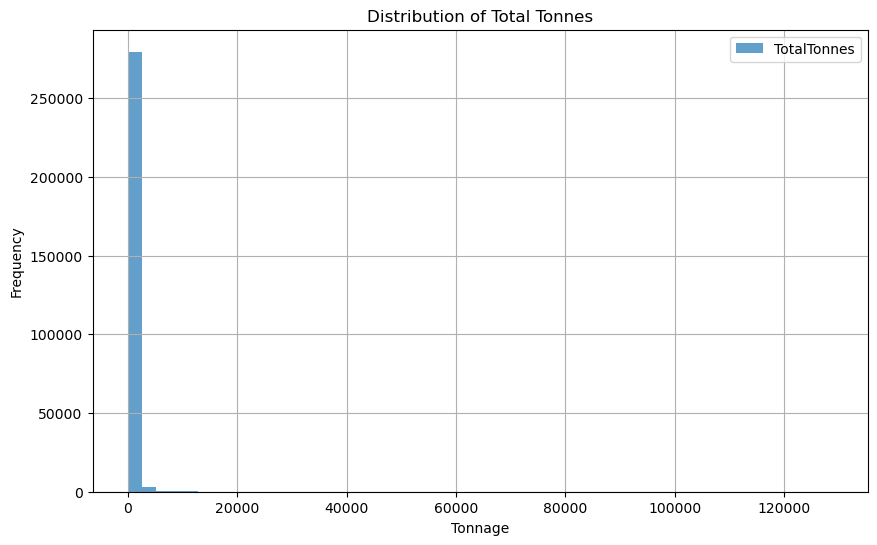

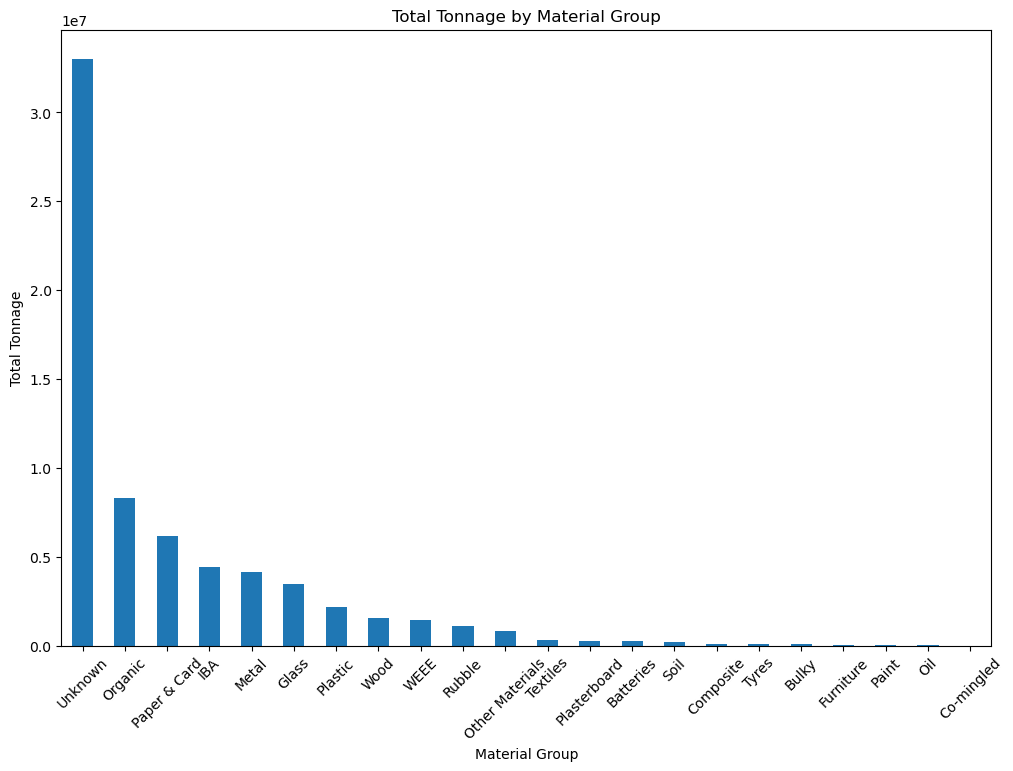

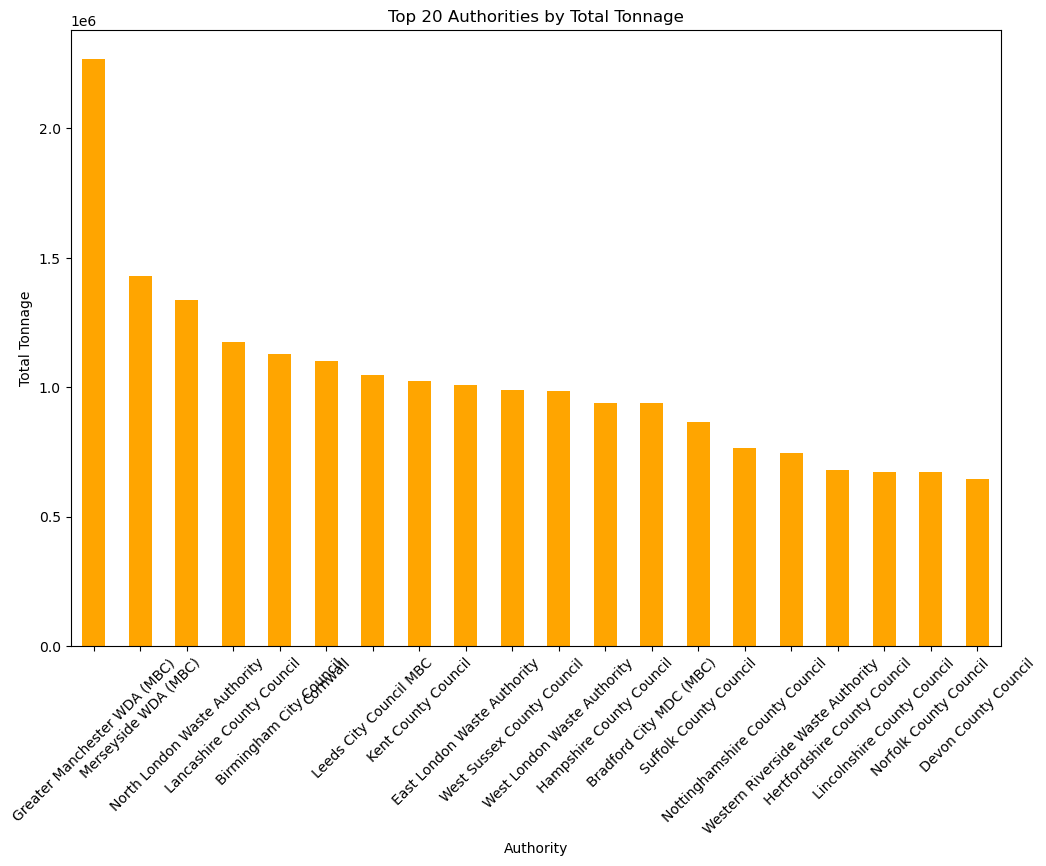

       WasteProcessorId  WasteStreamId  WasteProcessorOutputId  \
count      2.844630e+05   2.844630e+05            2.844630e+05   
mean       5.149549e+06   5.148114e+06            1.747759e+07   
std        1.175535e+05   1.175525e+05            8.102027e+06   
min        5.024010e+06   5.022579e+06            0.000000e+00   
25%        5.043267e+06   5.041839e+06            2.043296e+07   
50%        5.113876e+06   5.112446e+06            2.055291e+07   
75%        5.266924e+06   5.265478e+06            2.187836e+07   
max        5.401209e+06   5.399778e+06            2.286181e+07   

       SenderWasteProcessorOutputId    AuthorityId       PeriodId  \
count                  2.844630e+05  284463.000000  284463.000000   
mean                   8.447081e+06     237.363995     367.056731   
std                    1.039300e+07     146.405443       4.476517   
min                    0.000000e+00       1.000000     361.000000   
25%                    0.000000e+00     111.000000     365.0

In [5]:
import matplotlib.pyplot as plt

# Check basic statistics of the numeric columns
numeric_summary = cleaned_data.describe()

# Visualize distributions of key tonnage-related columns
plt.figure(figsize=(10, 6))
cleaned_data['TotalTonnes'].hist(bins=50, alpha=0.7, label='TotalTonnes')
plt.xlabel('Tonnage')
plt.ylabel('Frequency')
plt.title('Distribution of Total Tonnes')
plt.legend()
plt.show()

# Analyze tonnage by MaterialGroup
material_group_tonnage = cleaned_data.groupby('MaterialGroup')['TotalTonnes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
material_group_tonnage.plot(kind='bar')
plt.xlabel('Material Group')
plt.ylabel('Total Tonnage')
plt.title('Total Tonnage by Material Group')
plt.xticks(rotation=45)
plt.show()

# Analyze tonnage by Authority
authority_tonnage = cleaned_data.groupby('Authority')['TotalTonnes'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
authority_tonnage.plot(kind='bar', color='orange')
plt.xlabel('Authority')
plt.ylabel('Total Tonnage')
plt.title('Top 20 Authorities by Total Tonnage')
plt.xticks(rotation=45)
plt.show()

# Summary Statistics of Numerical Features
numeric_summary = cleaned_data.describe()
print(numeric_summary)


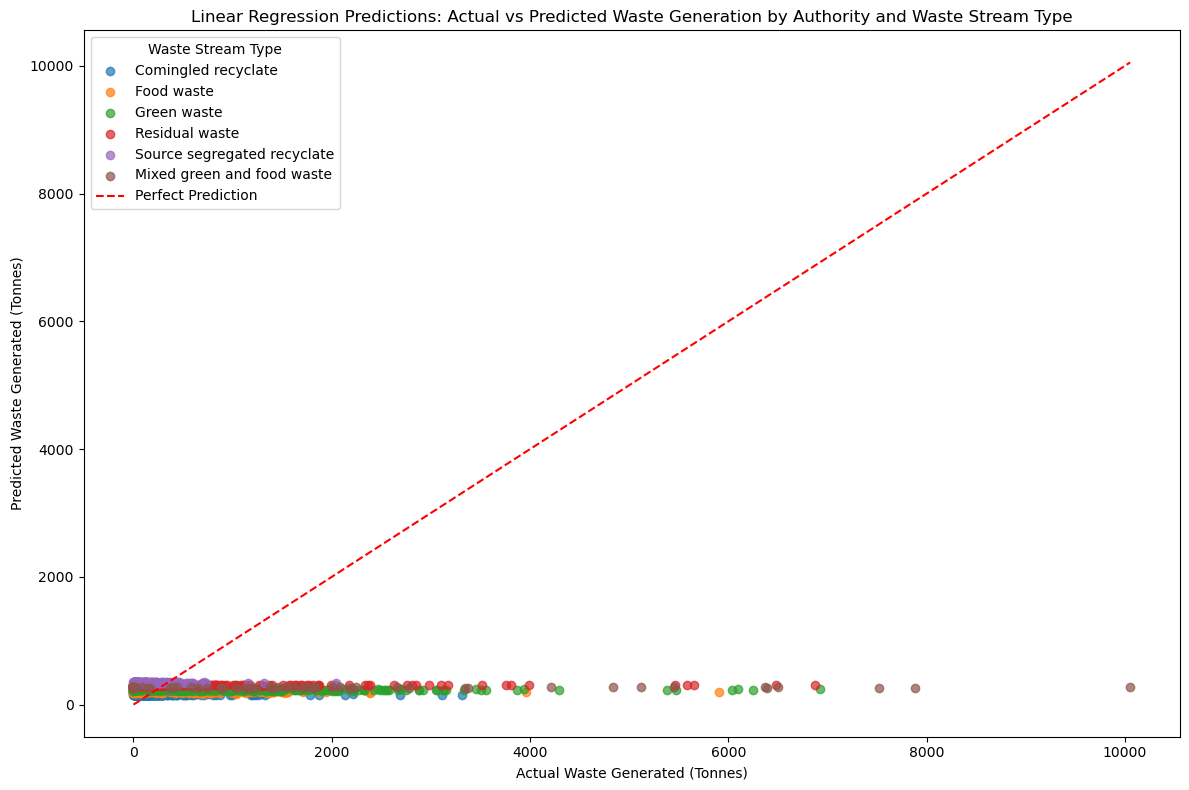

(373.70425619649905, 2497242.5421719146, 0.0025467926105702254)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Standardize 'Period' column to extract the year
waste_data['Year'] = waste_data['Period'].str.extract(r'(\d{2})$').astype(float) + 2000

# Encoding categorical variables (Authority and WasteStreamType)
from sklearn.preprocessing import LabelEncoder

encoder_authority = LabelEncoder()
encoder_stream = LabelEncoder()

waste_data['AuthorityEncoded'] = encoder_authority.fit_transform(waste_data['Authority'])
waste_data['WasteStreamTypeEncoded'] = encoder_stream.fit_transform(waste_data['WasteStreamType'])

# Select features and target for prediction
features = ['AuthorityEncoded', 'WasteStreamTypeEncoded', 'Year']
target = 'TotalTonnes'

# Drop rows with missing target values
waste_data = waste_data.dropna(subset=[target])

X = waste_data[features]
y = waste_data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regression_model.predict(X_test)

# Adding predictions to the test set for visualization
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred

# Decoding categorical values back to their original form for better visualization
test_results['Authority'] = encoder_authority.inverse_transform(test_results['AuthorityEncoded'])
test_results['WasteStreamType'] = encoder_stream.inverse_transform(test_results['WasteStreamTypeEncoded'])

# Aggregating data for visualization
predicted_vs_actual = test_results.groupby(['Authority', 'WasteStreamType'])[['Actual', 'Predicted']].mean().reset_index()

# Plotting actual vs predicted waste generation
plt.figure(figsize=(12, 8))
for waste_stream in predicted_vs_actual['WasteStreamType'].unique():
    data_subset = predicted_vs_actual[predicted_vs_actual['WasteStreamType'] == waste_stream]
    plt.scatter(data_subset['Actual'], data_subset['Predicted'], label=waste_stream, alpha=0.7)

plt.plot([0, max(predicted_vs_actual['Actual'])], [0, max(predicted_vs_actual['Actual'])], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Waste Generated (Tonnes)')
plt.ylabel('Predicted Waste Generated (Tonnes)')
plt.title('Linear Regression Predictions: Actual vs Predicted Waste Generation by Authority and Waste Stream Type')
plt.legend(title='Waste Stream Type')
plt.tight_layout()
plt.show()

# Displaying evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

Source-Specific Waste Generation Model with PCA (Linear Regression) - MAE: 2.158933487606202e-10, MSE: 3.0650557424395343e-19, R2: 1.0


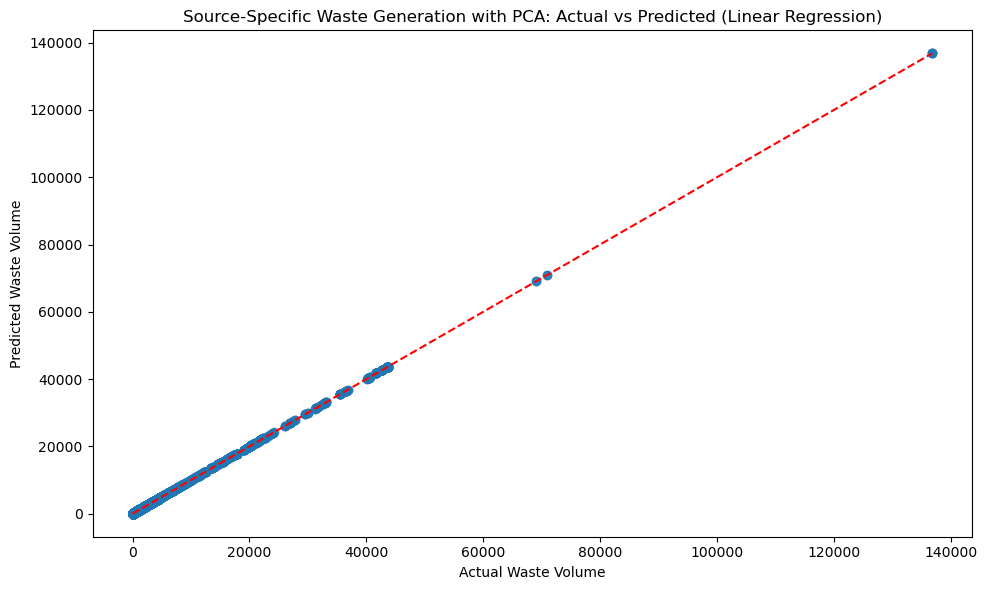

In [9]:
# Import necessary library for Linear Regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Check for relevant columns for PCA and source-specific waste prediction
source_columns = ['TonnesFromHHSources', 'TonnesFromCommercialSources', 
                  'TonnesFromIndustrialSources', 'TonnesFromNonHHSources']

if all(col in waste_data.columns for col in source_columns):
    # Prepare the dataset for PCA
    pca_data = waste_data[source_columns].fillna(0)

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(pca_data)
    waste_data['PC1'] = principal_components[:, 0]
    waste_data['PC2'] = principal_components[:, 1]

    # Aggregate waste data for modeling
    waste_data['TotalWaste'] = waste_data[source_columns].sum(axis=1)
    features = ['Year', 'PC1', 'PC2']
    target = 'TotalWaste'

    # Split the data into training and testing sets
    X = waste_data[features]
    y = waste_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lr_model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Source-Specific Waste Generation Model with PCA (Linear Regression) - MAE: {mae}, MSE: {mse}, R2: {r2}")

    # Visualization: Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Waste Volume')
    plt.ylabel('Predicted Waste Volume')
    plt.title('Source-Specific Waste Generation with PCA: Actual vs Predicted (Linear Regression)')
    plt.tight_layout()
    plt.show()
else:
    print("Required source-specific columns are missing from the dataset.")


Source-Specific Waste Generation Model with PCA - MAE: 0.3605422206609136, MSE: 758.0583529336169, R2: 0.999926997297972


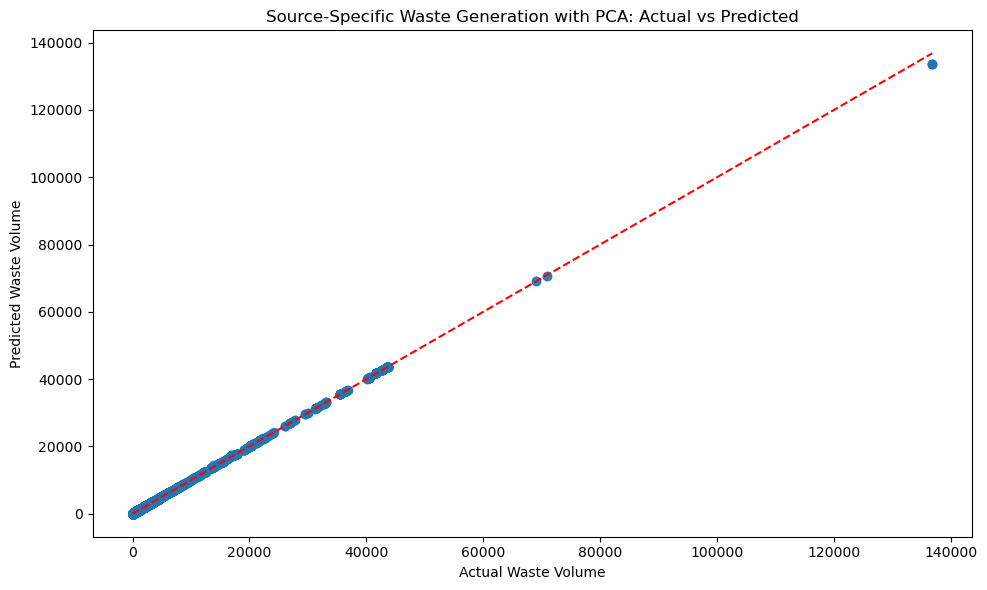

In [10]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Extract year from 'Period' column for temporal features
waste_data['Year'] = waste_data['Period'].str.extract(r'(\d{2})$').astype(float) + 2000

# Check for relevant columns for PCA and source-specific waste prediction
source_columns = ['TonnesFromHHSources', 'TonnesFromCommercialSources', 
                  'TonnesFromIndustrialSources', 'TonnesFromNonHHSources']

if all(col in waste_data.columns for col in source_columns):
    # Prepare the dataset for PCA
    pca_data = waste_data[source_columns].fillna(0)

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(pca_data)
    waste_data['PC1'] = principal_components[:, 0]
    waste_data['PC2'] = principal_components[:, 1]

    # Aggregate waste data for modeling
    waste_data['TotalWaste'] = waste_data[source_columns].sum(axis=1)
    
    features = ['Year', 'PC1', 'PC2']
    target = 'TotalWaste'

    # Split the data into training and testing sets
    X = waste_data[features]
    y = waste_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Source-Specific Waste Generation Model with PCA - MAE: {mae}, MSE: {mse}, R2: {r2}")

    # Visualization: Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Waste Volume')
    plt.ylabel('Predicted Waste Volume')
    plt.title('Source-Specific Waste Generation with PCA: Actual vs Predicted')
    plt.tight_layout()
    plt.show()
else:
    print("Required source-specific columns are missing from the dataset.")


Source-Specific Waste Generation Model with PCA (Gradient Boosting) - MAE: 11.594598317430359, MSE: 1074.2405340277494, R2: 0.9998965482521119


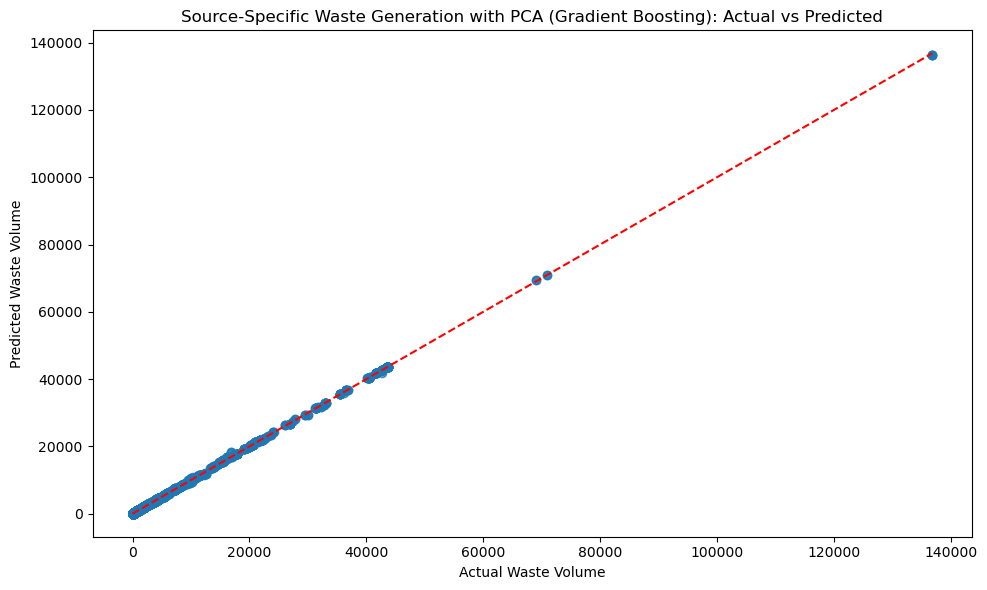

In [11]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor


# Extract year from 'Period' column for temporal features
waste_data['Year'] = waste_data['Period'].str.extract(r'(\d{2})$').astype(float) + 2000

# Check for relevant columns for PCA and source-specific waste prediction
source_columns = ['TonnesFromHHSources', 'TonnesFromCommercialSources', 
                  'TonnesFromIndustrialSources', 'TonnesFromNonHHSources']

if all(col in waste_data.columns for col in source_columns):
    # Prepare the dataset for PCA
    pca_data = waste_data[source_columns].fillna(0)

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(pca_data)
    waste_data['PC1'] = principal_components[:, 0]
    waste_data['PC2'] = principal_components[:, 1]

    # Aggregate waste data for modeling
    waste_data['TotalWaste'] = waste_data[source_columns].sum(axis=1)
    features = ['Year', 'PC1', 'PC2']
    target = 'TotalWaste'

    # Split the data into training and testing sets
    X = waste_data[features]
    y = waste_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Gradient Boosting model
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = gb_model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Source-Specific Waste Generation Model with PCA (Gradient Boosting) - MAE: {mae}, MSE: {mse}, R2: {r2}")

    # Visualization: Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Waste Volume')
    plt.ylabel('Predicted Waste Volume')
    plt.title('Source-Specific Waste Generation with PCA (Gradient Boosting): Actual vs Predicted')
    plt.tight_layout()
    plt.show()
else:
    print("Required source-specific columns are missing from the dataset.")


Source-Specific Waste Generation Model with PCA (Decision Tree) - MAE: 0.045288963493831616, MSE: 28.37909421213494, R2: 0.9999972670302351


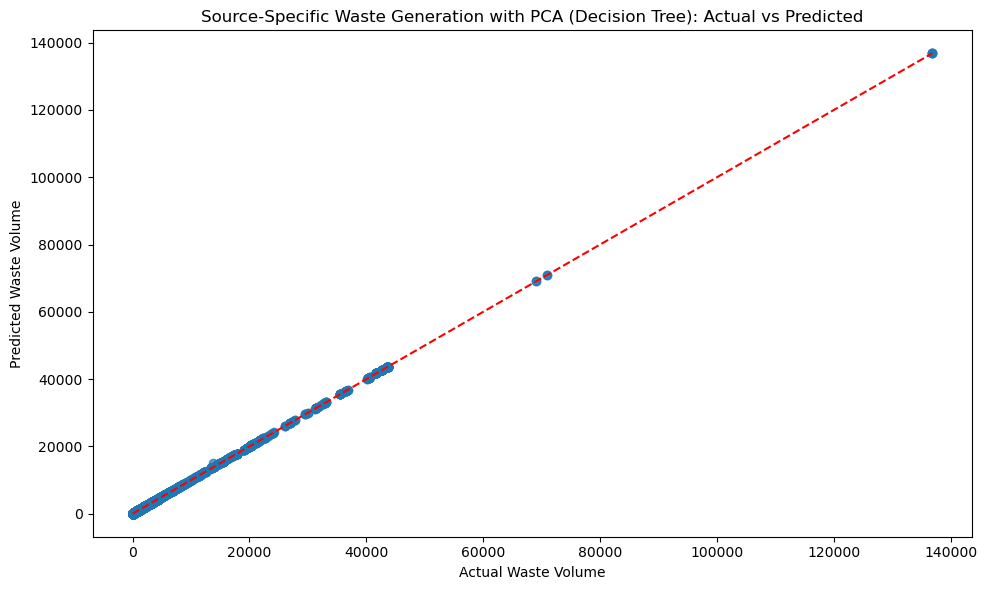

In [12]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

# Extract year from 'Period' column for temporal features
waste_data['Year'] = waste_data['Period'].str.extract(r'(\d{2})$').astype(float) + 2000

# Check for relevant columns for PCA and source-specific waste prediction
source_columns = ['TonnesFromHHSources', 'TonnesFromCommercialSources', 
                  'TonnesFromIndustrialSources', 'TonnesFromNonHHSources']

if all(col in waste_data.columns for col in source_columns):
    # Prepare the dataset for PCA
    pca_data = waste_data[source_columns].fillna(0)

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(pca_data)
    waste_data['PC1'] = principal_components[:, 0]
    waste_data['PC2'] = principal_components[:, 1]

    # Aggregate waste data for modeling
    waste_data['TotalWaste'] = waste_data[source_columns].sum(axis=1)
    features = ['Year', 'PC1', 'PC2']
    target = 'TotalWaste'

    # Split the data into training and testing sets
    X = waste_data[features]
    y = waste_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = dt_model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Source-Specific Waste Generation Model with PCA (Decision Tree) - MAE: {mae}, MSE: {mse}, R2: {r2}")

    # Visualization: Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Waste Volume')
    plt.ylabel('Predicted Waste Volume')
    plt.title('Source-Specific Waste Generation with PCA (Decision Tree): Actual vs Predicted')
    plt.tight_layout()
    plt.show()
else:
    print("Required source-specific columns are missing from the dataset.")


Source-Specific Waste Generation Model with PCA (MLP) - MAE: 0.7754099786808498, MSE: 2.109058890329659, R2: 0.9999997968929475


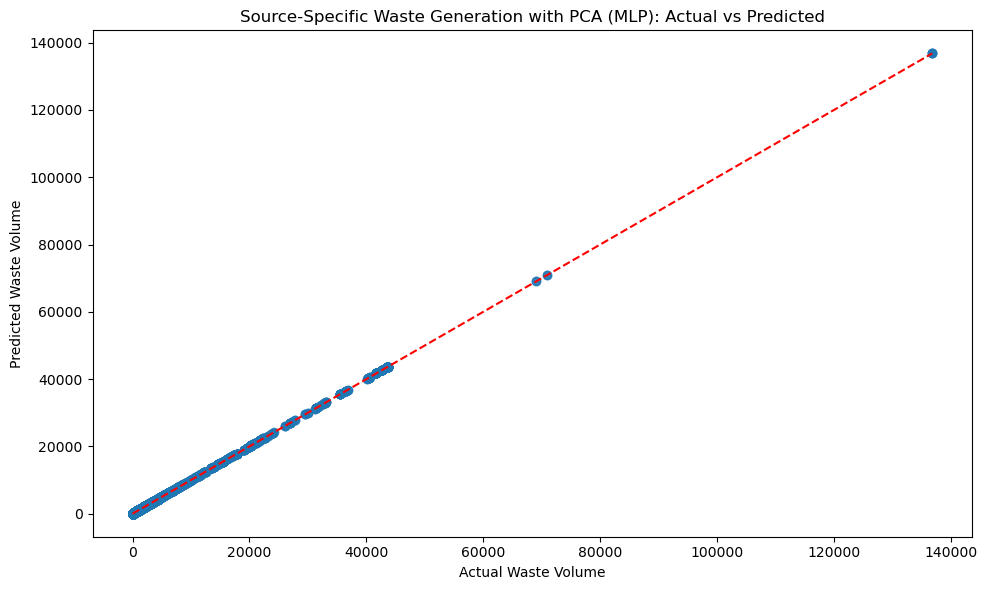

In [13]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor

# Extract year from 'Period' column for temporal features
waste_data['Year'] = waste_data['Period'].str.extract(r'(\d{2})$').astype(float) + 2000

# Check for relevant columns for PCA and source-specific waste prediction
source_columns = ['TonnesFromHHSources', 'TonnesFromCommercialSources', 
                  'TonnesFromIndustrialSources', 'TonnesFromNonHHSources']

if all(col in waste_data.columns for col in source_columns):
    # Prepare the dataset for PCA
    pca_data = waste_data[source_columns].fillna(0)

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(pca_data)
    waste_data['PC1'] = principal_components[:, 0]
    waste_data['PC2'] = principal_components[:, 1]

    # Aggregate waste data for modeling
    waste_data['TotalWaste'] = waste_data[source_columns].sum(axis=1)
    features = ['Year', 'PC1', 'PC2']
    target = 'TotalWaste'

    # Split the data into training and testing sets
    X = waste_data[features]
    y = waste_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train an MLP model
    mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
    mlp_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp_model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Source-Specific Waste Generation Model with PCA (MLP) - MAE: {mae}, MSE: {mse}, R2: {r2}")

    # Visualization: Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Waste Volume')
    plt.ylabel('Predicted Waste Volume')
    plt.title('Source-Specific Waste Generation with PCA (MLP): Actual vs Predicted')
    plt.tight_layout()
    plt.show()
else:
    print("Required source-specific columns are missing from the dataset.")


Source-Specific Waste Generation Model with PCA (KNN) - MAE: 2.053069410999609, MSE: 48979.13154668184, R2: 0.9952832009144688


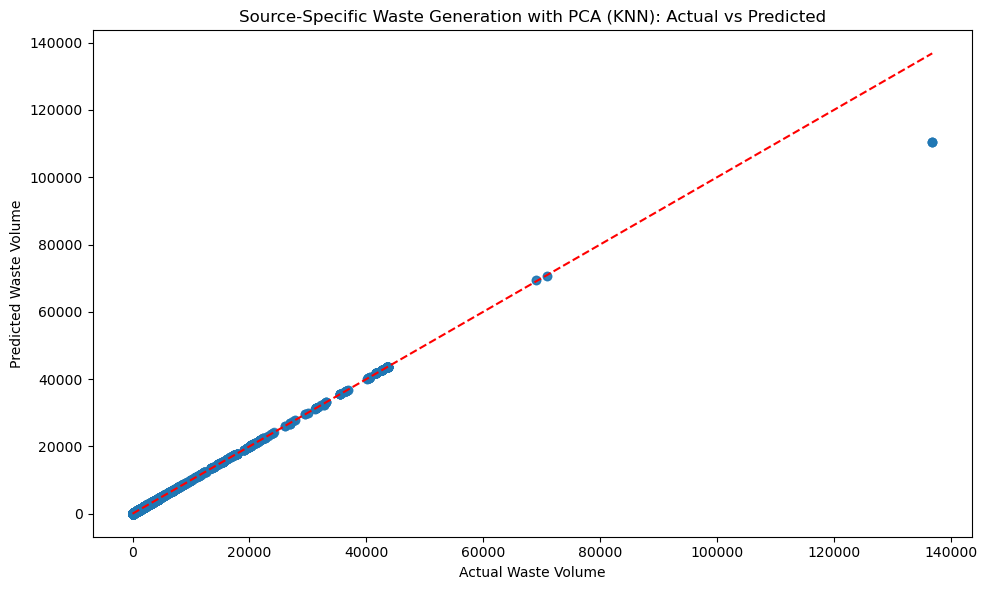

In [14]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

# Extract year from 'Period' column for temporal features
waste_data['Year'] = waste_data['Period'].str.extract(r'(\d{2})$').astype(float) + 2000

# Check for relevant columns for PCA and source-specific waste prediction
source_columns = ['TonnesFromHHSources', 'TonnesFromCommercialSources', 
                  'TonnesFromIndustrialSources', 'TonnesFromNonHHSources']

if all(col in waste_data.columns for col in source_columns):
    # Prepare the dataset for PCA
    pca_data = waste_data[source_columns].fillna(0)

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(pca_data)
    waste_data['PC1'] = principal_components[:, 0]
    waste_data['PC2'] = principal_components[:, 1]

    # Aggregate waste data for modeling
    waste_data['TotalWaste'] = waste_data[source_columns].sum(axis=1)
    features = ['Year', 'PC1', 'PC2']
    target = 'TotalWaste'

    # Split the data into training and testing sets
    X = waste_data[features]
    y = waste_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a K-Nearest Neighbors model
    knn_model = KNeighborsRegressor(n_neighbors=5)  # Default to 5 neighbors
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Source-Specific Waste Generation Model with PCA (KNN) - MAE: {mae}, MSE: {mse}, R2: {r2}")

    # Visualization: Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Waste Volume')
    plt.ylabel('Predicted Waste Volume')
    plt.title('Source-Specific Waste Generation with PCA (KNN): Actual vs Predicted')
    plt.tight_layout()
    plt.show()
else:
    print("Required source-specific columns are missing from the dataset.")


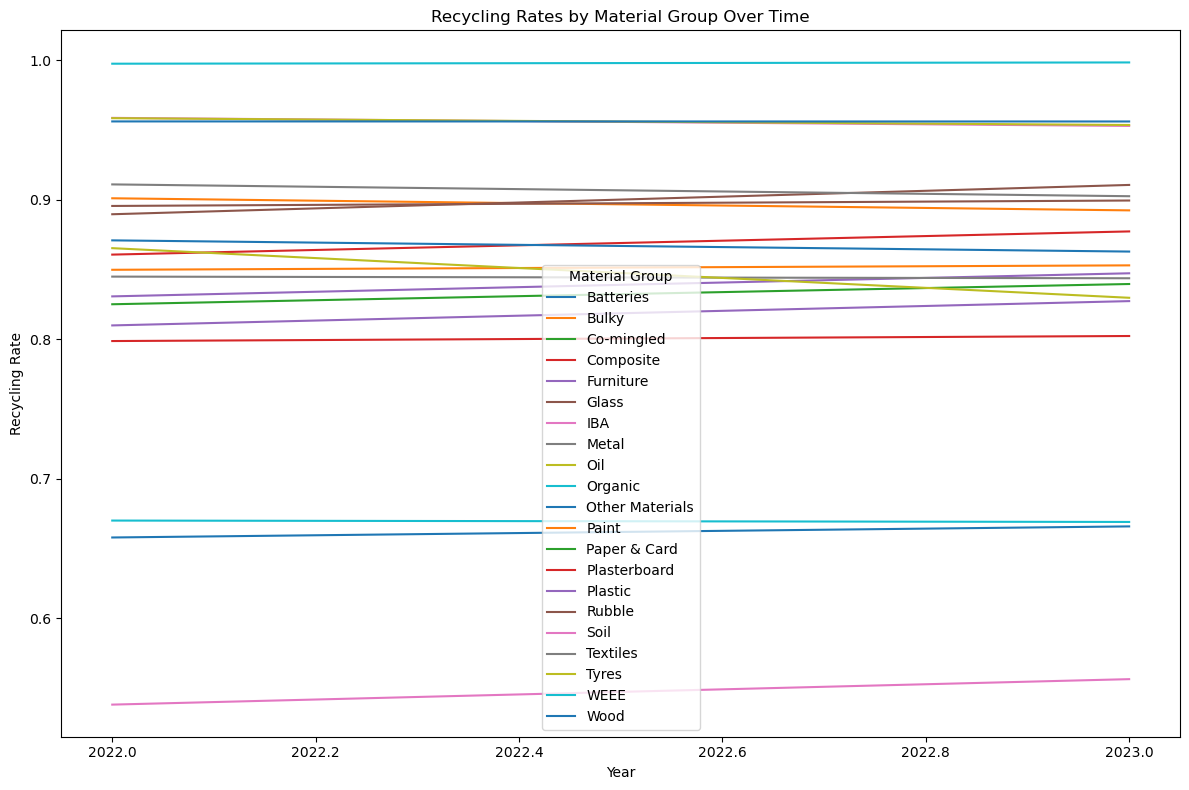

In [15]:
# Extracting the year from the 'Period' column for time-based analysis
waste_data['Year'] = waste_data['Period'].str.extract(r'(\d{2})$').astype(float) + 2000

# Checking for 'TonnesByMaterial' and 'TotalTonnes' for recycling rates
if 'TonnesByMaterial' in waste_data.columns and 'TotalTonnes' in waste_data.columns:
    # Calculate recycling rates
    waste_data['RecyclingRate'] = waste_data['TonnesByMaterial'] / waste_data['TotalTonnes']

    # Group by material group and year
    recycling_analysis = waste_data.groupby(['MaterialGroup', 'Year'])['RecyclingRate'].mean().reset_index()

    # Visualization: Recycling rates by material group
    plt.figure(figsize=(12, 8))
    for material in recycling_analysis['MaterialGroup'].unique():
        material_data = recycling_analysis[recycling_analysis['MaterialGroup'] == material]
        plt.plot(material_data['Year'], material_data['RecyclingRate'], label=material)

    plt.xlabel('Year')
    plt.ylabel('Recycling Rate')
    plt.title('Recycling Rates by Material Group Over Time')
    plt.legend(title='Material Group')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for recycling rates (TonnesByMaterial, TotalTonnes) are missing.")

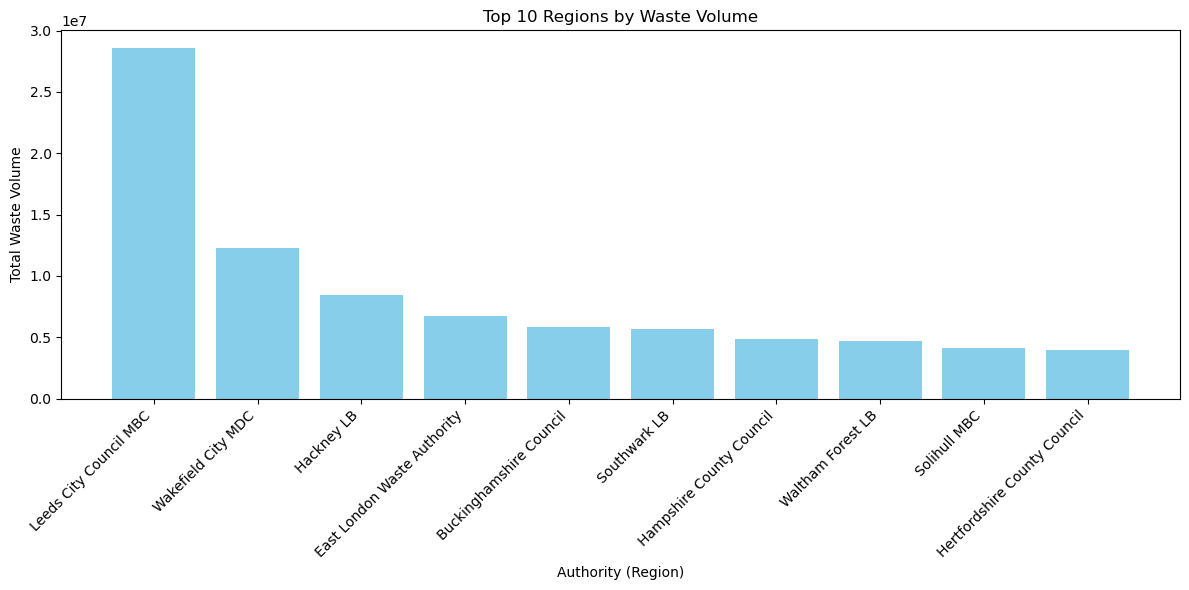

In [16]:
# Generate regional waste volume comparisons
if 'Authority' in waste_data.columns and 'TotalWaste' in waste_data.columns:
    # Aggregate total waste volumes by region (Authority)
    regional_comparison = waste_data.groupby('Authority')['TotalWaste'].sum().reset_index()

    # Sort by total waste volume
    regional_comparison = regional_comparison.sort_values(by='TotalWaste', ascending=False)

    # Plot top 10 regions by waste volume
    top_regions = regional_comparison.head(10)

    plt.figure(figsize=(12, 6))
    plt.bar(top_regions['Authority'], top_regions['TotalWaste'], color='skyblue')
    plt.xlabel('Authority (Region)')
    plt.ylabel('Total Waste Volume')
    plt.title('Top 10 Regions by Waste Volume')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()




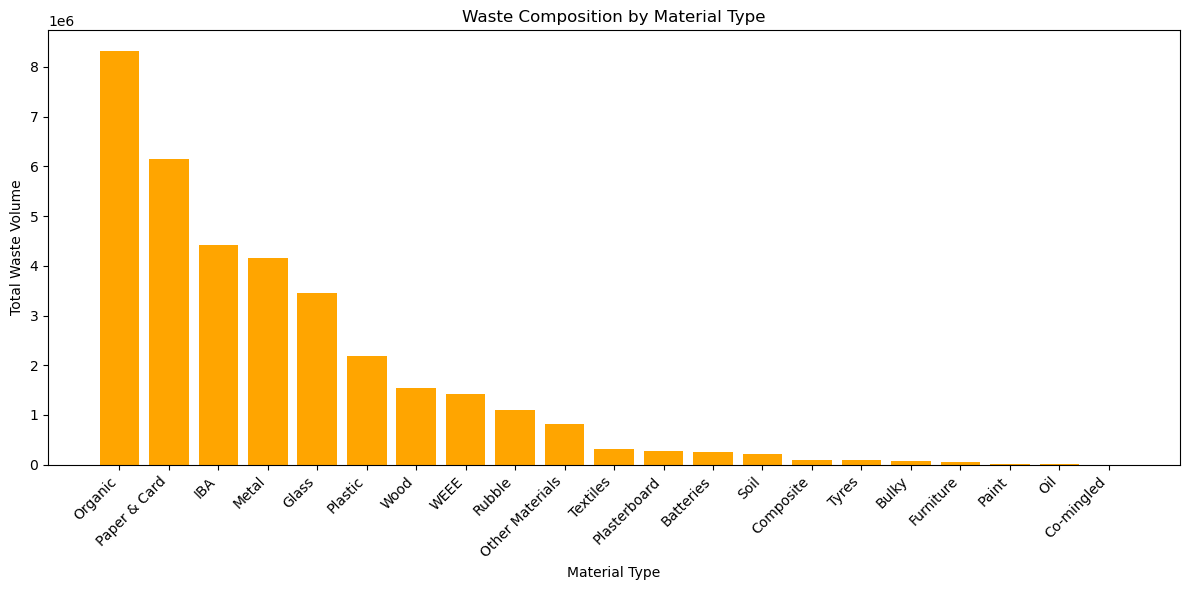

In [17]:
# Analyze waste composition by material type if relevant columns exist
if 'MaterialGroup' in waste_data.columns and 'TotalTonnes' in waste_data.columns:
    # Aggregate waste data by material group
    material_composition = waste_data.groupby('MaterialGroup')['TotalTonnes'].sum().reset_index()

    # Sort by total tonnage
    material_composition = material_composition.sort_values(by='TotalTonnes', ascending=False)

    # Plot waste composition by material type
    plt.figure(figsize=(12, 6))
    plt.bar(material_composition['MaterialGroup'], material_composition['TotalTonnes'], color='orange')
    plt.xlabel('Material Type')
    plt.ylabel('Total Waste Volume')
    plt.title('Waste Composition by Material Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



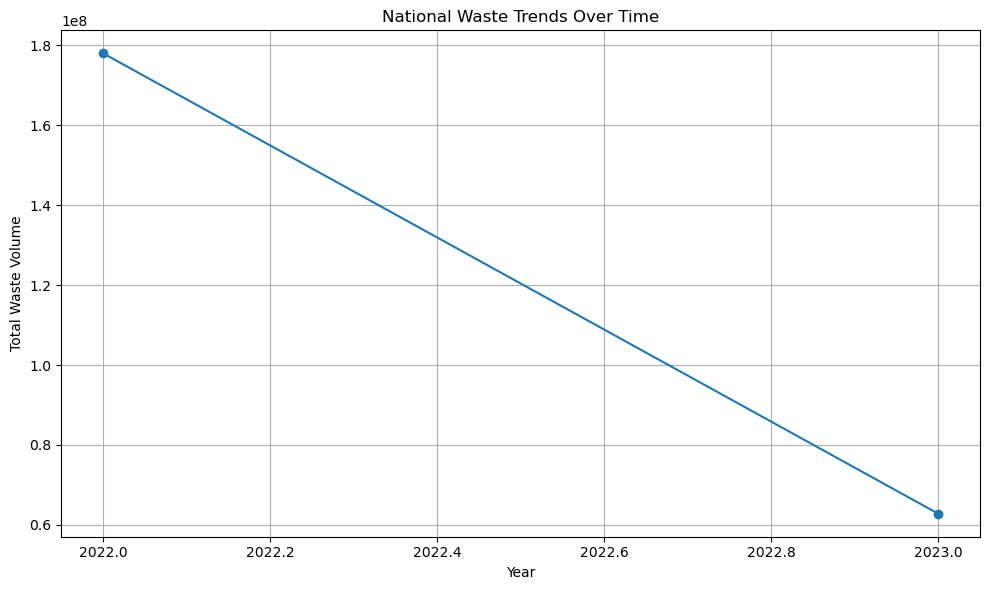

In [18]:
# Aggregate data to display national waste trends over time
if 'Year' in waste_data.columns and 'TotalWaste' in waste_data.columns:
    # Group data by year and sum the total waste
    national_trends = waste_data.groupby('Year')['TotalWaste'].sum().reset_index()

    # Plot national trends over time
    plt.figure(figsize=(10, 6))
    plt.plot(national_trends['Year'], national_trends['TotalWaste'], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Total Waste Volume')
    plt.title('National Waste Trends Over Time')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for national trends analysis ('Year', 'TotalWaste') are missing.")


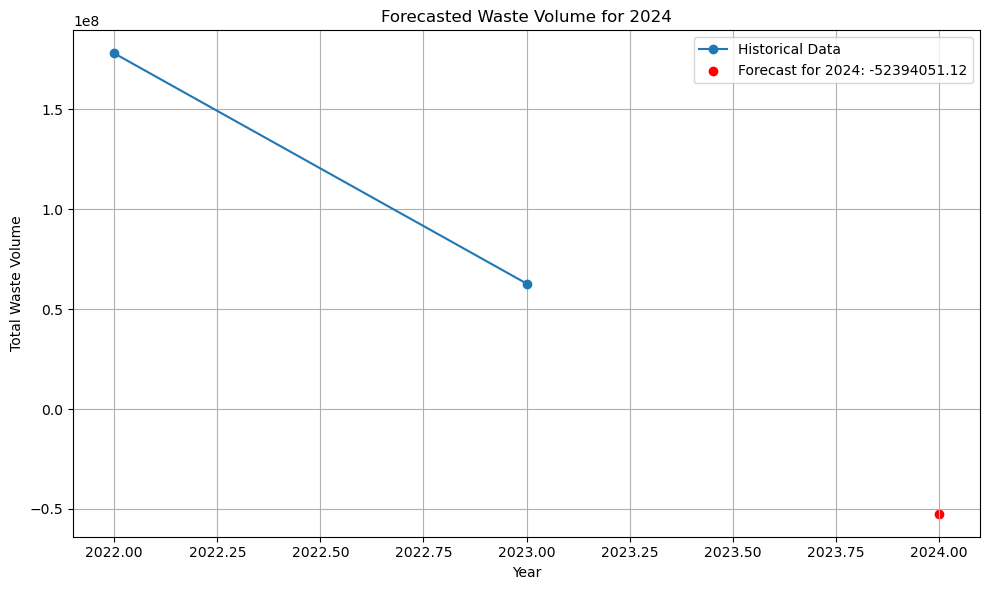

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for forecasting
if 'Year' in waste_data.columns and 'TotalWaste' in waste_data.columns:
    # Extract year and total waste
    forecast_data = waste_data.groupby('Year')['TotalWaste'].sum().reset_index()
    X_forecast = forecast_data[['Year']].values
    y_forecast = forecast_data['TotalWaste'].values

    # Train a linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_forecast, y_forecast)

    # Forecast for 2024
    year_2024 = np.array([[2024]])
    forecast_2024 = linear_model.predict(year_2024)

    # Plot historical and forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_data['Year'], forecast_data['TotalWaste'], marker='o', label='Historical Data')
    plt.scatter(2024, forecast_2024, color='red', label=f'Forecast for 2024: {forecast_2024[0]:.2f}')
    plt.xlabel('Year')
    plt.ylabel('Total Waste Volume')
    plt.title('Forecasted Waste Volume for 2024')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display forecasted waste volume for 2024
    forecast_2024[0]
else:
    print("Required columns for forecasting ('Year', 'TotalWaste') are missing.")


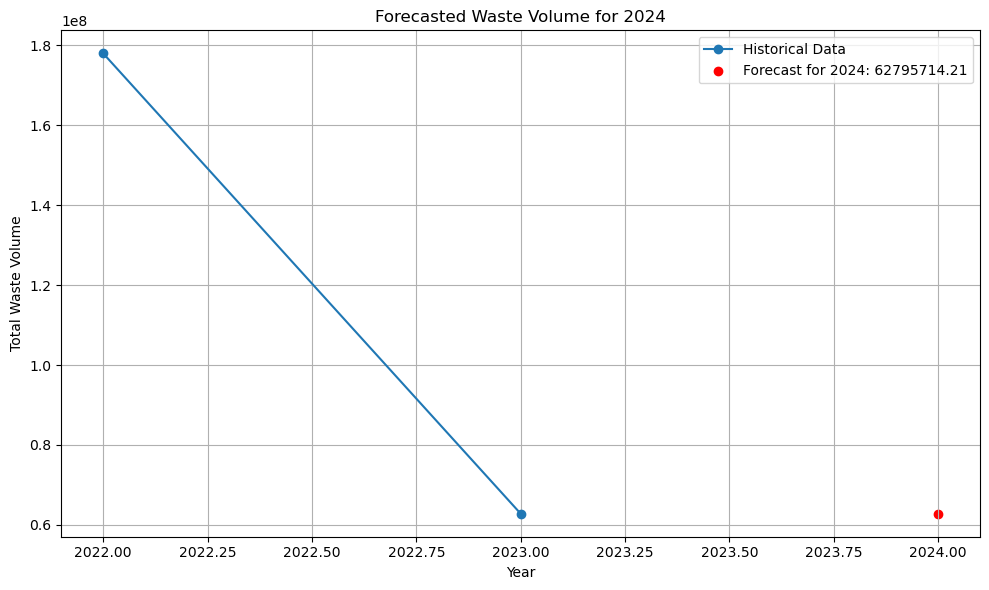

In [20]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Prepare data for forecasting
if 'Year' in waste_data.columns and 'TotalWaste' in waste_data.columns:
    # Extract year and total waste
    forecast_data = waste_data.groupby('Year')['TotalWaste'].sum().reset_index()
    X_forecast = forecast_data[['Year']].values
    y_forecast = forecast_data['TotalWaste'].values

    # Train a Decision Tree model
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X_forecast, y_forecast)

    # Forecast for 2024
    year_2024 = np.array([[2024]])
    forecast_2024 = tree_model.predict(year_2024)

    # Plot historical and forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_data['Year'], forecast_data['TotalWaste'], marker='o', label='Historical Data')
    plt.scatter(2024, forecast_2024, color='red', label=f'Forecast for 2024: {forecast_2024[0]:.2f}')
    plt.xlabel('Year')
    plt.ylabel('Total Waste Volume')
    plt.title('Forecasted Waste Volume for 2024')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display forecasted waste volume for 2024
    forecast_2024[0]
else:
    print("Required columns for forecasting ('Year', 'TotalWaste') are missing.")


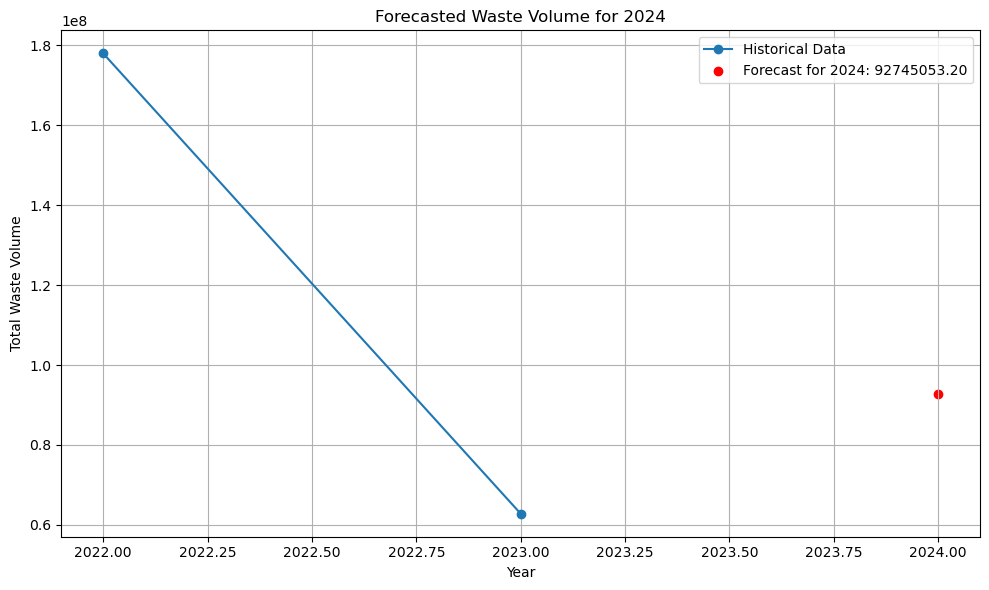

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data for forecasting
if 'Year' in waste_data.columns and 'TotalWaste' in waste_data.columns:
    # Extract year and total waste
    forecast_data = waste_data.groupby('Year')['TotalWaste'].sum().reset_index()
    X_forecast = forecast_data[['Year']].values
    y_forecast = forecast_data['TotalWaste'].values

    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_forecast, y_forecast)

    # Forecast for 2024
    year_2024 = np.array([[2024]])
    forecast_2024 = rf_model.predict(year_2024)

    # Plot historical and forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_data['Year'], forecast_data['TotalWaste'], marker='o', label='Historical Data')
    plt.scatter(2024, forecast_2024, color='red', label=f'Forecast for 2024: {forecast_2024[0]:.2f}')
    plt.xlabel('Year')
    plt.ylabel('Total Waste Volume')
    plt.title('Forecasted Waste Volume for 2024')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display forecasted waste volume for 2024
    forecast_2024[0]
else:
    print("Required columns for forecasting ('Year', 'TotalWaste') are missing.")


C:\Users\psk16\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


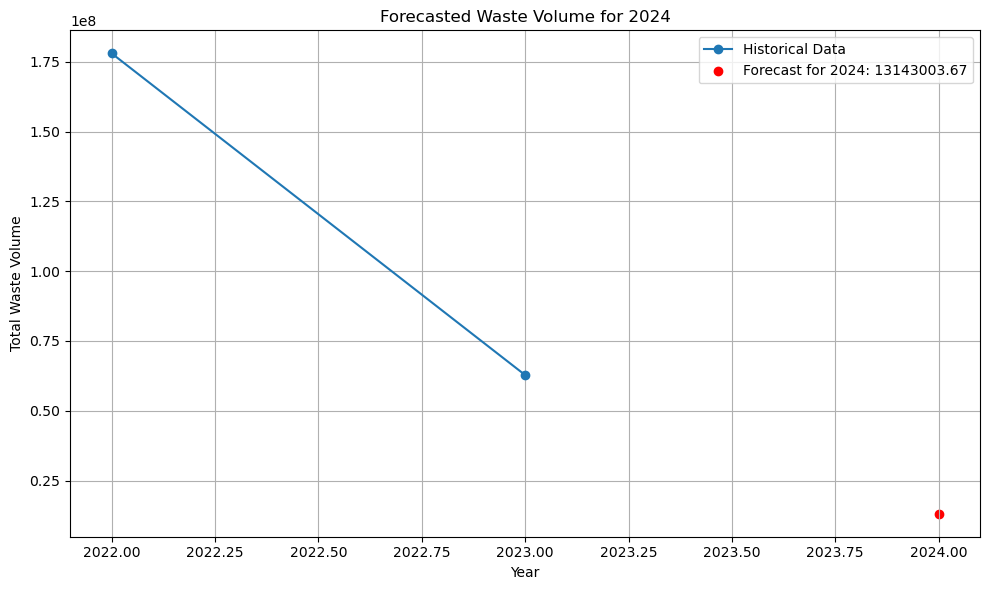

In [22]:
from sklearn.neural_network import MLPRegressor

# Prepare data for forecasting
if 'Year' in waste_data.columns and 'TotalWaste' in waste_data.columns:
    # Extract year and total waste
    forecast_data = waste_data.groupby('Year')['TotalWaste'].sum().reset_index()
    X_forecast = forecast_data[['Year']].values
    y_forecast = forecast_data['TotalWaste'].values

    # Train an MLP model
    mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), 
                              activation='relu', 
                              solver='adam', 
                              random_state=42, 
                              max_iter=1000)
    mlp_model.fit(X_forecast, y_forecast)

    # Forecast for 2024
    year_2024 = np.array([[2024]])
    forecast_2024 = mlp_model.predict(year_2024)

    # Plot historical and forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_data['Year'], forecast_data['TotalWaste'], marker='o', label='Historical Data')
    plt.scatter(2024, forecast_2024, color='red', label=f'Forecast for 2024: {forecast_2024[0]:.2f}')
    plt.xlabel('Year')
    plt.ylabel('Total Waste Volume')
    plt.title('Forecasted Waste Volume for 2024')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display forecasted waste volume for 2024
    forecast_2024[0]
else:
    print("Required columns for forecasting ('Year', 'TotalWaste') are missing.")


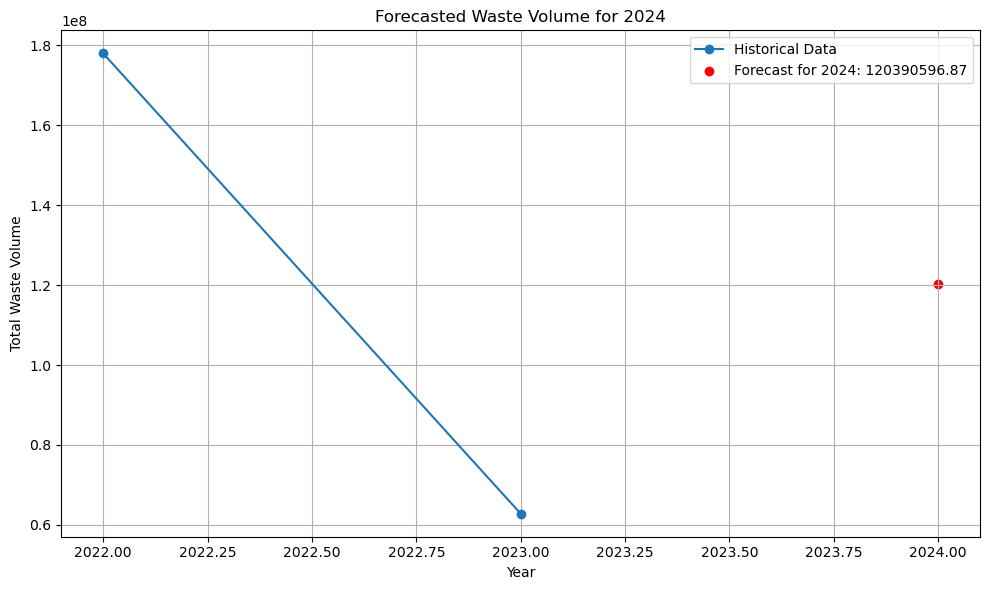

Forecasted Waste Volume for 2024: 120390596.87


In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Prepare data for forecasting
if 'Year' in waste_data.columns and 'TotalWaste' in waste_data.columns:
    # Extract year and total waste
    forecast_data = waste_data.groupby('Year')['TotalWaste'].sum().reset_index()
    X_forecast = forecast_data[['Year']].values
    y_forecast = forecast_data['TotalWaste'].values

    # Dynamically set n_neighbors based on dataset size
    n_neighbors = min(3, len(X_forecast))  # Ensure n_neighbors <= n_samples
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_forecast, y_forecast)

    # Forecast for 2024
    year_2024 = np.array([[2024]])
    forecast_2024 = knn_model.predict(year_2024)

    # Plot historical and forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_data['Year'], forecast_data['TotalWaste'], marker='o', label='Historical Data')
    plt.scatter(2024, forecast_2024, color='red', label=f'Forecast for 2024: {forecast_2024[0]:.2f}')
    plt.xlabel('Year')
    plt.ylabel('Total Waste Volume')
    plt.title('Forecasted Waste Volume for 2024')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display forecasted waste volume for 2024
    print(f"Forecasted Waste Volume for 2024: {forecast_2024[0]:.2f}")
else:
    print("Required columns for forecasting ('Year', 'TotalWaste') are missing.")


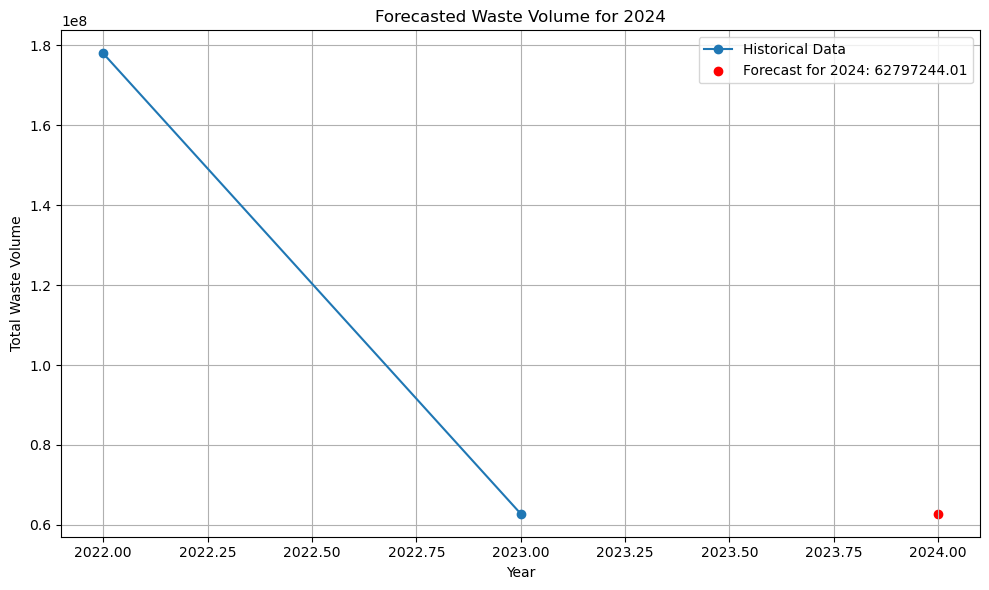

Forecasted Waste Volume for 2024: 62797244.01


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Prepare data for forecasting
if 'Year' in waste_data.columns and 'TotalWaste' in waste_data.columns:
    # Extract year and total waste
    forecast_data = waste_data.groupby('Year')['TotalWaste'].sum().reset_index()
    X_forecast = forecast_data[['Year']].values
    y_forecast = forecast_data['TotalWaste'].values

    # Train a Gradient Boosting model
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_model.fit(X_forecast, y_forecast)

    # Forecast for 2024
    year_2024 = np.array([[2024]])
    forecast_2024 = gb_model.predict(year_2024)

    # Plot historical and forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_data['Year'], forecast_data['TotalWaste'], marker='o', label='Historical Data')
    plt.scatter(2024, forecast_2024, color='red', label=f'Forecast for 2024: {forecast_2024[0]:.2f}')
    plt.xlabel('Year')
    plt.ylabel('Total Waste Volume')
    plt.title('Forecasted Waste Volume for 2024')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display forecasted waste volume for 2024
    print(f"Forecasted Waste Volume for 2024: {forecast_2024[0]:.2f}")
else:
    print("Required columns for forecasting ('Year', 'TotalWaste') are missing.")


In [26]:
# Analyze high-priority materials and regions for waste reduction
if 'MaterialGroup' in waste_data.columns and 'Authority' in waste_data.columns and 'TotalTonnes' in waste_data.columns:
    # Group data by material and region
    material_region_analysis = waste_data.groupby(['MaterialGroup', 'Authority'])['TotalTonnes'].sum().reset_index()

    # Identify top materials and regions
    top_materials = material_region_analysis.groupby('MaterialGroup')['TotalTonnes'].sum().sort_values(ascending=False).head(5)
    top_regions = material_region_analysis.groupby('Authority')['TotalTonnes'].sum().sort_values(ascending=False).head(5)

    # Display high-priority materials and regions
    print("Top 5 High-Waste Materials:")
    print(top_materials)

    print("\nTop 5 High-Waste Regions:")
    print(top_regions)

    # Recommendations
    print("\nStrategies for Waste Reduction:")
    for material in top_materials.index:
        print(f"- Focus on reducing {material} waste through recycling and reuse initiatives.")
    for region in top_regions.index:
        print(f"- Target {region} with educational campaigns and improved waste management policies.")
else:
    print("Required columns ('MaterialGroup', 'Authority', 'TotalTonnes') are missing.")


Top 5 High-Waste Materials:
MaterialGroup
Organic         8317800.802
Paper & Card    6154566.257
IBA             4416154.156
Metal           4152077.855
Glass           3450194.217
Name: TotalTonnes, dtype: float64

Top 5 High-Waste Regions:
Authority
Greater Manchester WDA (MBC)    806713.357
Merseyside WDA (MBC)            793153.364
Cornwall                        745996.266
Bradford City MDC (MBC)         491965.920
West Sussex County Council      486879.081
Name: TotalTonnes, dtype: float64

Strategies for Waste Reduction:
- Focus on reducing Organic waste through recycling and reuse initiatives.
- Focus on reducing Paper & Card waste through recycling and reuse initiatives.
- Focus on reducing IBA waste through recycling and reuse initiatives.
- Focus on reducing Metal waste through recycling and reuse initiatives.
- Focus on reducing Glass waste through recycling and reuse initiatives.
- Target Greater Manchester WDA (MBC) with educational campaigns and improved waste managemen